In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
import xgcm
import xarray as xr
import sectionate
import xoverturning
import matplotlib.pyplot as plt

# Conservatively diagnosing model transports into an arbitrary closed region with `sectionate`

## Load example model grid and transport diagnosics

In [13]:
from example_dataset_grids import load_CM4p25
ds, grid = load_CM4p25()

## Define the two OSNAP sections:

In [14]:
Labrador_section_lons=[-56.8775, -52.0956, -49.8604, -47.6107, -44.8000, -50, -65, -65]
Labrador_section_lats=[52.0166, 52.6648, 53.5577, 58.8944, 60.4000, 71, 63.5, 57.5]
Labrador_section_lons = np.append(Labrador_section_lons, Labrador_section_lons[0])
Labrador_section_lats = np.append(Labrador_section_lats, Labrador_section_lats[0])

## Closed section surrounding Labrador Sea

In [15]:
i, j, x, y = sectionate.grid_section(
    grid,
    Labrador_section_lons,
    Labrador_section_lats,
    topology="MOM-tripolar"
)

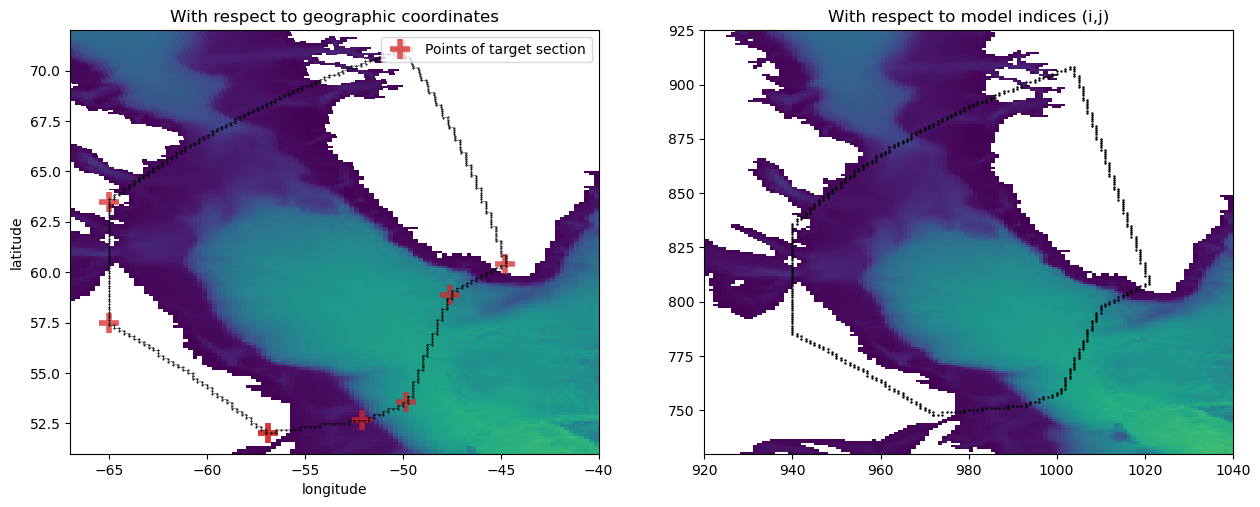

In [16]:
depth_masked = ds['deptho'].where(ds['deptho'] != 0)

plt.figure(figsize=[15,5.5])
plt.subplot(1,2,1)
plt.pcolormesh(ds['geolon_c'], ds['geolat_c'], depth_masked)
plt.plot(Labrador_section_lons, Labrador_section_lats, "C3+", markersize=15., mew=4., alpha=0.75, label="Points of target section")
plt.plot(x, y, 'k.-', markersize=1., lw=0.3)
plt.axis([-67,-40, 51, 72])
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("With respect to geographic coordinates")
plt.legend(loc="upper right")

plt.subplot(1,2,2)
plt.pcolormesh(depth_masked)
plt.plot(i, j, 'k.', markersize=1.5, lw=0.5)
plt.axis([920, 1040, 730, 925])
plt.title("With respect to model indices (i,j)")
plt.show()

### Plot the hydrography and cell-integrated mass transport across the section

In [17]:
T = sectionate.extract_tracer('thetao', grid, i, j)

In [18]:
Trp = sectionate.convergent_transport(grid, i, j)

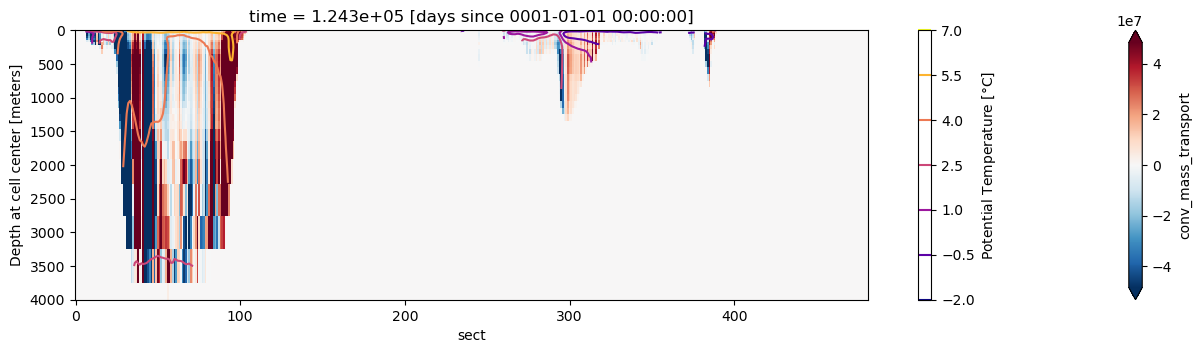

In [19]:
plt.figure(figsize=(16, 3.5))
Trp.isel(time=0)['conv_mass_transport'].plot(cmap='RdBu_r', x="sect", yincrease=False, ylim=[4000,0], robust=True)
cs = T.isel(time=0).plot.contour(vmin=-2, vmax=7, cmap='plasma', x="sect", yincrease=False, ylim=[4000,0])
plt.colorbar(cs, label=r"Potential Temperature [$\degree$C]")

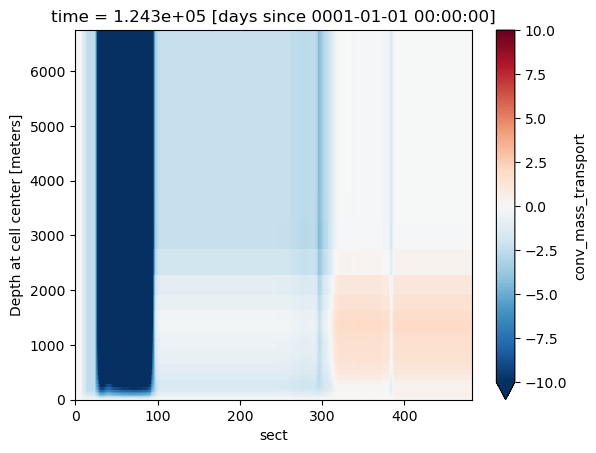

In [20]:
rho0 = 1035.
(Trp['conv_mass_transport'].isel(time=0).cumsum("sect").cumsum("z_l") / rho0*1e-6).plot(x="sect", cmap="RdBu_r", vmin=-10, vmax=10)